In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
def chebyshev(ex, std, prob):
    n = np.sqrt(1/prob)
    low = ex - n * std
    high = ex + n * std
    return low, high

In [5]:
def add_chebyshev_low(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_low

def add_chebyshev_high(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_high

def harmonic(n):
    return sum([1 / (i+1) for i in range(n)])

In [6]:
df = pd.read_csv("test.csv"); df

,m,n,max,empty
0,25,100,2,78
1,25,100,2,78
2,25,100,2,78
3,25,100,2,80
4,25,100,2,79
...,...,...,...,...
39995,15000,10000,8,2221
39996,15000,10000,8,2242
39997,15000,10000,8,2290
39998,15000,10000,7,2231


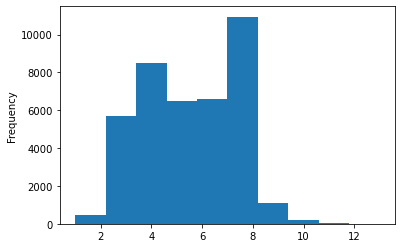

In [7]:
df["max"].plot.hist()

In [29]:
df.groupby(["n", "m"])["empty"].describe().tail(12)

count    mean   std     min     25%     50%     75%     max
n     m                                                                 
9800  2450  100.00 7633.61 16.31 7578.00 7624.00 7631.00 7645.00 7670.00
      4900  100.00 5940.36 22.61 5881.00 5924.00 5941.00 5959.00 5986.00
      9800  100.00 3604.24 25.17 3533.00 3590.50 3602.50 3622.25 3665.00
      14700 100.00 2188.01 32.06 2074.00 2170.00 2189.00 2208.00 2286.00
9900  2475  100.00 7708.85 13.22 7676.00 7701.00 7708.50 7717.50 7741.00
      4950  100.00 6001.36 21.95 5954.00 5986.00 6000.00 6017.00 6051.00
      9900  100.00 3647.41 30.72 3583.00 3625.00 3647.50 3670.25 3723.00
      14850 100.00 2205.70 34.63 2116.00 2185.75 2206.00 2231.25 2280.00
10000 2500  100.00 7787.50 15.96 7743.00 7777.00 7788.00 7799.00 7826.00
      5000  100.00 6063.33 23.23 6007.00 6048.75 6062.50 6076.25 6121.00
      10000 100.00 3682.78 27.80 3622.00 3661.75 3683.50 3705.00 3734.00
      15000 100.00 2232.41 30.07 2164.00 2211.00 2234.50 2250.50 2309.00

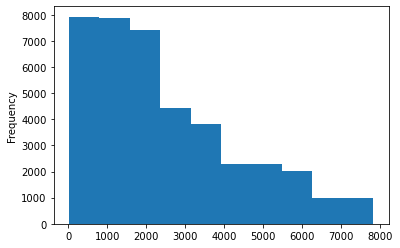

In [8]:
df["empty"].plot.hist()

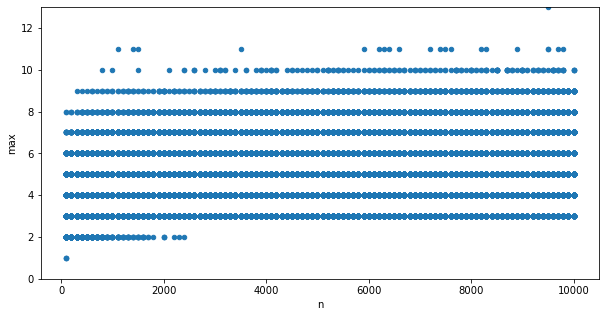

In [9]:
df.plot.scatter(x="n", y="max", figsize=(10, 5), ylim=(0, 13))

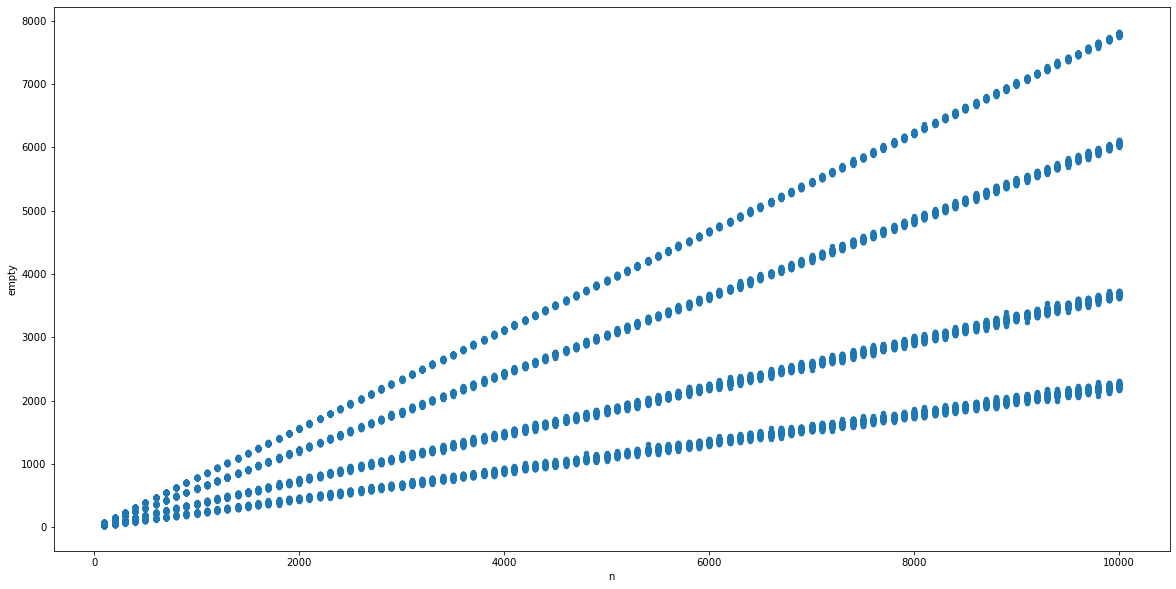

In [10]:
df.plot.scatter(x="n", y="empty", figsize=(20, 10))

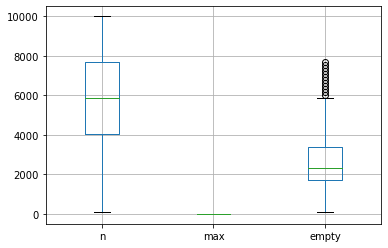

In [11]:
grouped = df.groupby(["m"])
grouped.mean().boxplot()

In [12]:
# grouped.plot()

In [13]:
grouped.mean()

,n,max,empty
m,,,
25,100.00,2.16,77.72
50,150.00,2.62,108.03
75,300.00,2.31,233.55
100,233.33,3.39,156.68
125,500.00,2.67,389.47
...,...,...,...
14400,9600.00,8.06,2141.71
14550,9700.00,8.11,2164.39
14700,9800.00,8.11,2188.01


# Max

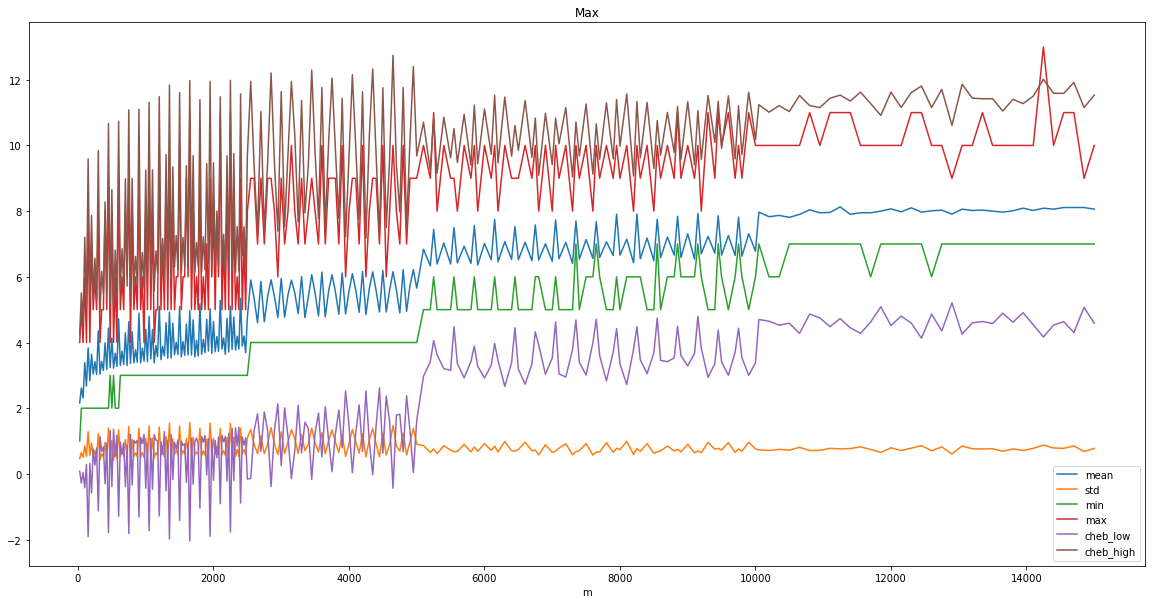

In [14]:
described = grouped["max"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.plot(title="Max", figsize=(20,10))

# Empty
* Niech $Y$ będzie _liczbą pustych urn_
* Szukamy $\mathbb{E}[Y]$
* Niech $X_i$ będą zmiennymi indykatorowymi takimi że jeżeli $X_i = 1$ to _$i$-ta urna jest pusta_, $X_i = 0$ w p.p.

$$Y = X_1 + X_2 + \cdots + X_n$$

Problem sprowadza się do policzenia $\mathbb{E}[X_i]$ dla każdego $i$

$$E[Y] = E[X_1] + E[X_2] + \cdots + E[X_n]$$

Zatem z liniowości:

$$E[X_i] = 1 P(X_i = 1) + 0 P(X_i = 0) = P(X_i = 1) = P(\text{urna $i$ jest pusta}) = \left(1 - \frac{1}{n}\right)^m$$

ostatnia równość bierze się z tego że kule $1, 2, \ldots, m$ muszą wszystkie wpaść do urny różnej od $i$ - każde z prawdopodobieństwem $1 - \frac{1}{n}$.

Stąd

$$E[Y] = \sum_i^n \mathbb{E}[X_i] = \sum_i^n \mathbb{E}\left[\left(1 - \frac{1}{n}\right)^m\right] = n \left(1 - \frac{1}{n}\right)^m$$

Gdy $m = n$

$$E[Y] = n \left(1 - \frac{1}{n}\right)^n = \frac{n}{e}$$

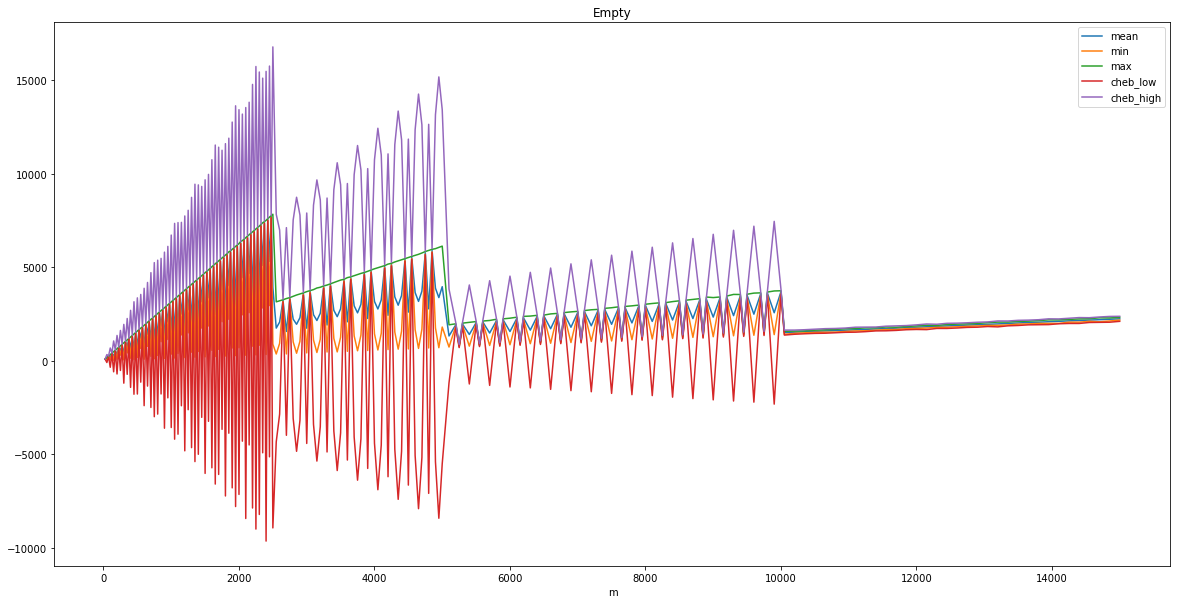

In [15]:
described = grouped["empty"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.drop(["std"], axis=1).plot(title="Empty", figsize=(20,10))